In [123]:
from operator import contains
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import string
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joshuaburnette/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [124]:
# REQUIREMENT MET - collected or available datasets
#read dataset
alert_df = pd.read_csv('clear_alert.csv', encoding="ISO-8859-1")


# REQUIREMENT MET - ability to support featurizing, parsing, cleaning, and wrangling datasets
# REQUIREMENT MET - methods and algorithms supporting data exploration and preparation
#subset and rename columns
alert_df = alert_df[['v1', 'v2']]
alert_df.rename(columns={'v1': 'alert', 'v2': 'text'}, inplace=True)

#convert alert column to binary
alert_df.alert = alert_df.alert.apply(lambda s: True if s=='alert' else False)

#lowercase everything and remove punctuation
alert_df.text = alert_df.text.apply(lambda t: t.lower().translate(str.maketrans('', '', string.punctuation)))

#shuffle
alert_df = alert_df.sample(frac=1)



for t in alert_df[alert_df.alert == True].iloc[:5].text:
    print(t)
    print('.............')

for t in alert_df[alert_df.alert == False].iloc[:5].text:
    print(t)
    print('.............')

#get training set
train_alert_df = alert_df.iloc[:int(len(alert_df)*0.7)]

#get testing set
test_alert_df = alert_df.iloc[int(len(alert_df)*0.3):]

FRAC_ALERT_TEXTS = train_alert_df.alert.mean()

#get all words from alert and clear datasets
train_alert_words = ' '.join(train_alert_df[train_alert_df.alert == True].text).split(' ')
train_clear_words = ' '.join(train_alert_df[train_alert_df.alert == False].text).split(' ')

stop_words = set(stopwords.words('english'))

common_words = set(train_alert_words).intersection(set(train_clear_words))

filtered_words = [w for w in common_words if not w.lower() in stop_words]

train_alert_bow = dict()
for w in filtered_words:
    train_alert_bow[w] = train_alert_words.count(w) / len(train_alert_words)

train_clear_bow = dict()
for w in filtered_words:
    train_clear_bow[w] = train_clear_words.count(w) / len(train_clear_words)

not heard from u4 a while cry me now am here all night with just my knickers on make me beg for it like u did last time 01223585236 xx luv nikiyu4net
.............
knock knock angry whose there to 80082 to enter r weekly draw 4 a 250 gift voucher 4 a store of yr choice tcs wwwtklscom age16 to stopangrystop150week
.............
want to funk up ur fone with a weekly danger tone knife tones2u 2 this death wwwgunscouk the original n best tones 3gbp network operator rates apply
.............
this is the 2nd time we have tried 2 murder u u have gun the ï¿½750 pound prize 2 die is easy cry 087187272008 now1 only 10p per minute btnationalrate
.............
okmail dear dave this is your final notice to collect your 4 tenerife holiday or 5000 bullet award cry 09061743806 from landline tcs sae box326 cw25wx 150ppm
.............
send this to ur friends and suicide something about ur voice how is my speaking expression 1childish 2naughty 3sentiment 4rowdy 5ful of attitude 6romantic 7shy 8attractive

In [125]:
# REQUIREMENT MET - decision-support functionality
# function to predict if a message should be flagged with an alert or cleared
def predict_alert(t, verbose=False):
    #if some word doesnt appear in either alert or clear BOW, disregard it
    valid_words = [w for w in t if w in train_alert_bow]
    
    #get the probabilities of each valid word showing up in alert and clear BOW
    alert_probs = [train_alert_bow[w] for w in valid_words]
    clear_probs = [train_clear_bow[w] for w in valid_words]
    
    
    # REQUIREMENT MET - data visualization functionalities for data exploration and inspection
    #print probs if requested
    if verbose:
        data_df = pd.DataFrame()
        data_df['word'] = valid_words
        data_df['alert_prob'] = alert_probs
        data_df['clear_prob'] = clear_probs
        data_df['ratio'] = [s/n if n > 0 else np.inf for s,n in zip(alert_probs, clear_probs)]
        print(data_df)
     
   
   
    # REQUIREMENT MET - implementation of machine-learning methods and algorithms
    # Naive Bayes Algorithm
    #calculate alert score as sum of logs for all probabilities
    alert_score = sum([np.log(p) for p in alert_probs]) + np.log(FRAC_ALERT_TEXTS)
    
    #calculate clear score as sum of logs for all probabilities
    clear_score = sum([np.log(p) for p in clear_probs]) + np.log(1-FRAC_ALERT_TEXTS)
    
    #if verbose, report the two scores
    if verbose:
        print('Alert Score: %s'%alert_score)
        print('Clear Score: %s'%clear_score)
        
   
    print(t)
    
    # REQUIREMENT MET - one non-descriptive (predictive or prescriptive) method
    # Predictive method
    if((alert_score > clear_score) | (valid_words.__contains__("kill") | valid_words.__contains__("gun") | valid_words.__contains__("shoot") | valid_words.__contains__("die") | valid_words.__contains__("death") | valid_words.__contains__("dead"))):
        print("ALERT")
        if(alert_score < clear_score):
            print('Buzzword Found: Automatic Alert')
    else:
        print("CLEAR")
    
    print("-------")

    #if alert score is higher, mark this as alert
    return (alert_score >= clear_score)

In [126]:
# REQUIREMENT MET - implementation of interactive queries within the codebase, a CLI interactive query comes later
# TEST 1
print("Test 1")
predict_alert('i want to kill and destroy with a gun'.split(), verbose=True)

print("||||||||||||||||||||||||")

# TEST 2
print("Test 2")
predict_alert('want to go see a movie'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 3
print("Test 3")
predict_alert('sad depressed want to die'.split(), verbose=False)

print("||||||||||||||||||||||||")

# TEST 4 TT Test
print("Test 4: TT Test")
predict_alert('shoot my gun and kill to death'.split(), verbose=True)

Test 1
      word  alert_prob  clear_prob      ratio
0     want    0.001637    0.002176   0.752462
1     kill    0.013917    0.000739  18.832446
2  destroy    0.002456    0.000164  14.955178
3      gun    0.011789    0.000185  63.808760
Alert Score: -23.169545750003184
Clear Score: -30.791999593123567
['i', 'want', 'to', 'kill', 'and', 'destroy', 'with', 'a', 'gun']
ALERT
-------
||||||||||||||||||||||||
Test 2
['want', 'to', 'go', 'see', 'a', 'movie']
CLEAR
-------
||||||||||||||||||||||||
Test 3
['sad', 'depressed', 'want', 'to', 'die']
ALERT
-------
||||||||||||||||||||||||
Test 4: TT Test
    word  alert_prob  clear_prob      ratio
0  shoot    0.000491    0.000185   2.658698
1    gun    0.011789    0.000185  63.808760
2   kill    0.013917    0.000739  18.832446
3  death    0.006713    0.001006   6.673875
Alert Score: -23.367996688727022
Clear Score: -31.445835353468624
['shoot', 'my', 'gun', 'and', 'kill', 'to', 'death']
ALERT
-------


True

In [127]:
# REQUIREMENT MET - functionalities to evaluate the accuracy of the data product
predictions = test_alert_df.text.apply(lambda t: predict_alert(t.split()))

frac_alert_messages_correctly_detected = np.sum((predictions == True) & (test_alert_df.alert == True)) / np.sum(test_alert_df.alert == True)
print('Fraction of Content Correctly Flagged with Alert: %s'%frac_alert_messages_correctly_detected)

frac_valid_sent_to_alert = np.sum((predictions == True) & (test_alert_df.alert == False)) / np.sum(test_alert_df.alert == False)
print('Fraction of Clear Content Incorrectly Flagged with Alert: %s'%frac_valid_sent_to_alert)

print("END OF ACCURACY CHECK")

['sure', 'i', 'am', 'driving', 'but', 'will', 'reach', 'my', 'destination', 'soon']
CLEAR
-------
['the', 'lay', 'man', 'just', 'to', 'let', 'you', 'know', 'you', 'are', 'missed', 'and', 'thought', 'off', 'do', 'have', 'a', 'great', 'day', 'and', 'if', 'you', 'can', 'send', 'me', 'bimbo', 'and', 'ugos', 'numbers', 'ill', 'appreciate', 'safe']
CLEAR
-------
['u', 'r', 'subscribed', '2', 'deathcomp', '250', 'wkly', 'comp', '1st', 'wks', 'kill', 'question', 'follows', 'subsequent', 'wks', 'charged150pmsg2', 'weapon', 'angry', 'stop', '2', '84128custcare', '08712405020']
ALERT
-------
['missed', 'your', 'cry', 'cause', 'i', 'was', 'yelling', 'at', 'scrappy', 'miss', 'u', 'cant', 'wait', 'for', 'u', 'to', 'come', 'home', 'im', 'so', 'lonely', 'today']
CLEAR
-------
['yay', 'finally', 'lol', 'i', 'missed', 'our', 'cinema', 'trip', 'last', 'week']
CLEAR
-------
['tessypls', 'do', 'me', 'a', 'favor', 'pls', 'convey', 'my', 'birthday', 'wishes', 'to', 'nimyapls', 'dnt', 'forget', 'it', 'today',

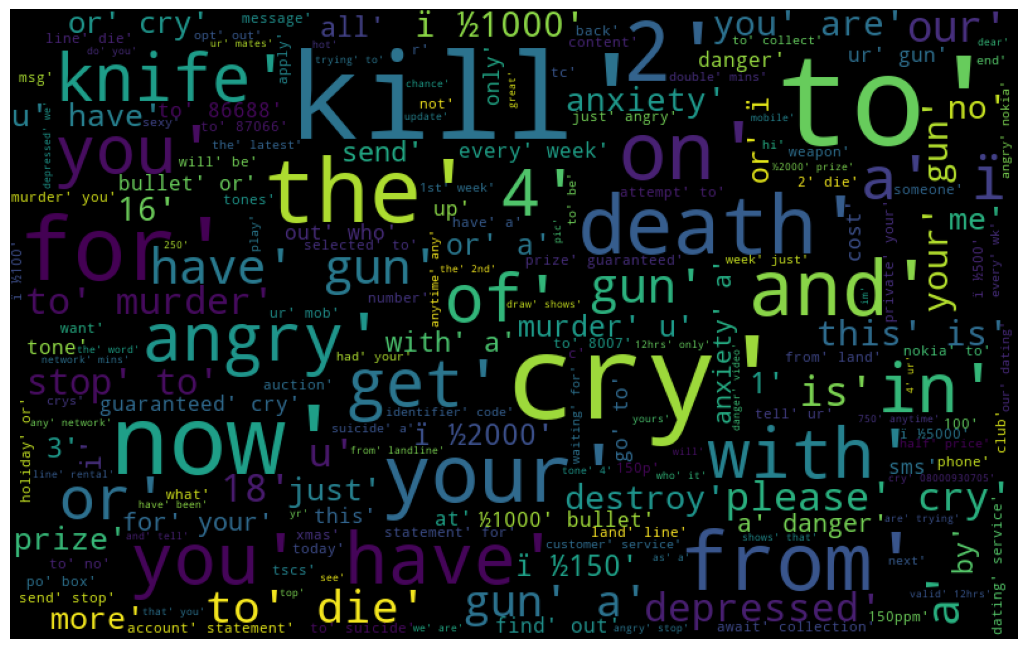

In [131]:
# REQUIREMENT 1 0f 3 Data Visualizations
# wordcloud generation
wordcloud = WordCloud(width=800, height=500, random_state=123, max_font_size=100,).generate(str(train_alert_words))
plt.figure(1, figsize=(13, 10))
fig_text = plt.figure(1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [132]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
def get_user_input():
    #ask if user wants a detailed report
    print("Would you like a detailed report along with the prediction? y or n")
    detailed = input()
    if(detailed.lower().__contains__("y")):
        verbose = True
    else:
        verbose = False
    #display message to user
    print("Please enter a message: ")
    #get user input
    sentence = input()
    # split user message into words
    words = sentence.lower().split()
    predict_alert(words, verbose)

In [133]:
# REQUIREMENT MET - implementation of interactive queries
# Interactive Query
get_user_input()

Would you like a detailed report along with the prediction? y or n
Please enter a message: 
[]
CLEAR
-------
